In [1]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [18]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
y.shape

print(x)


[[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]
 [ 0.64768854]
 [-0.46341769]
 [ 0.54256004]
 [ 0.61167629]
 [ 1.0035329 ]
 [ 0.8219025 ]
 [ 1.53803657]
 [ 0.73846658]
 [-0.21967189]
 [-0.8084936 ]
 [ 0.09176078]
 [-1.95967012]
 [ 0.51326743]
 [ 1.03099952]
 [-2.6197451 ]
 [ 0.49671415]
 [ 0.09707755]
 [-0.46572975]
 [ 0.91540212]
 [ 1.56464366]
 [ 1.46564877]
 [-0.60063869]
 [-0.03582604]
 [-0.60170661]
 [-1.19620662]
 [ 0.35711257]
 [ 0.37569802]
 [ 0.26105527]
 [-0.5297602 ]
 [-0.90802408]
 [ 0.19686124]
 [-0.29900735]
 [ 0.36163603]
 [ 0.82254491]
 [-0.29169375]
 [ 0.36139561]
 [-0.676922  ]
 [ 1.52302986]
 [-0.51827022]
 [-0.23415337]
 [-0.39210815]
 [-0.3011037 ]
 [-0.64511975]
 [ 0.32875111]
 [ 0.2088636 ]
 [-0.32766215]
 [ 0.00511346]
 [-0.23413696]
 [ 1.47789404]
 [-0.38508228]
 [ 0.34361829]
 [ 0.33126343]
 [-0.18565898]
 [-0.23458713]
 [-1.98756891]
 [ 0.32408397]
 [-0.2257763 ]
 [-1.10633497]
 [-0.70205309]
 [-1.46351495]
 [ 0.96864499]
 [-1.72491

In [19]:
x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [20]:
y = y.view(y.shape[0], 1)

In [21]:
y.shape

torch.Size([100, 1])

In [22]:
y

tensor([[ 6.2687e+01],
        [-2.3764e+01],
        [-2.5687e+01],
        [ 7.9365e+00],
        [-1.5475e+01],
        [ 3.6094e+01],
        [-4.0794e+01],
        [-1.0823e+01],
        [ 2.1415e+01],
        [ 2.2799e+01],
        [ 3.7224e+01],
        [ 8.9567e+01],
        [ 4.1551e+01],
        [ 1.5018e+01],
        [-6.1876e+01],
        [ 2.1404e+01],
        [-8.9110e+01],
        [ 1.8679e+01],
        [ 1.4234e+01],
        [-1.2670e+02],
        [ 1.2823e+01],
        [ 1.5695e+00],
        [-3.9292e+01],
        [ 1.8950e+01],
        [ 8.4121e+01],
        [ 6.7974e+01],
        [ 3.0328e+00],
        [ 6.9943e+00],
        [-4.2729e+01],
        [-7.4268e+01],
        [ 2.5665e+01],
        [ 4.3362e+01],
        [ 6.3743e-01],
        [-2.1273e+01],
        [-4.9396e+01],
        [-1.6240e+01],
        [-2.7917e+01],
        [ 7.1497e-02],
        [ 6.8466e+01],
        [ 1.5671e+01],
        [ 3.0485e+01],
        [-3.4745e+01],
        [ 6.0252e+01],
        [-1

In [32]:
n_features = 1

model = nn.Linear(n_features, n_features)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [33]:
for epoch in range(100):
    y_pred = model(x)
    los = loss(y, y_pred)

    los.backward()

    optimizer.step()

    optimizer.zero_grad()

    if(epoch % 9 == 0):
        print(f'epoch: {epoch+1}, loss: {los.item()}')

epoch: 1, loss: 2130.689208984375
epoch: 10, loss: 701.200927734375
epoch: 19, loss: 398.04730224609375
epoch: 28, loss: 331.5438232421875
epoch: 37, loss: 316.6246032714844
epoch: 46, loss: 313.2300109863281
epoch: 55, loss: 312.45086669921875
epoch: 64, loss: 312.2711486816406
epoch: 73, loss: 312.22955322265625
epoch: 82, loss: 312.21990966796875
epoch: 91, loss: 312.2176818847656
epoch: 100, loss: 312.2171630859375


In [34]:
predicted = model(x).detach().numpy()

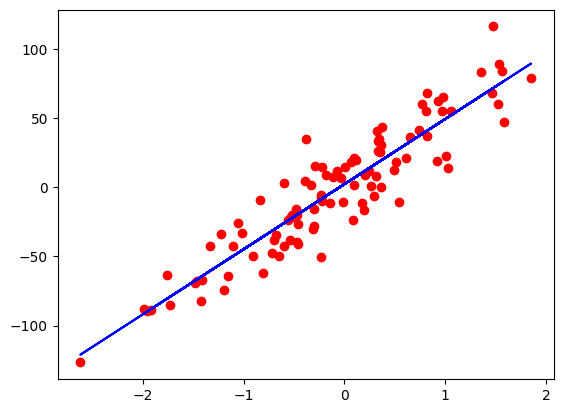

In [35]:
plt.plot(x, y, 'ro')
plt.plot(x, predicted, 'b')